---
title: "Basics of Exploratory Data Analysis"
date: "2025-05-09"
categories: [machine learning, python, kaggle]
format:
  html: default
  pdf: false
---

In [705]:
#| echo: false
#| output: false

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_log_error
# Set the overall style (whitegrid is good for plots with grids)
sns.set_style("darkgrid")

# Set a pinkish color palette
sns.set_palette("pastel")  # or use a custom one below

# Define a custom pinkish color palette
# pink_palette = ["#FFC0CB", "#FF69B4", "#FFB6C1", "#DB7093", "#FF1493"]
blue_palette = ["#a2cffe", "#70b7f0", "#4693e0", "#1c6fdc", "#0047ab"]

sns.set_palette(blue_palette)

# Loading the data
- This data is from the Playground series in Kaggle (Season 5, Episode 5)
    - Calorie Prediction Competition
- We let the `id` column in csv files to be the indexes in the dataframe, else it would have become an additional and unnecessary feature to handle

In [1]:
train_df = pd.read_csv('playground-series-s5e5/train.csv', index_col='id')
test_df = pd.read_csv('playground-series-s5e5/test.csv', index_col='id')
original_df = pd.read_csv('playground-series-s5e5/calories.csv', index_col="User_ID")

In [2]:
test_df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
id,,,,,,,
750000,male,45,177.0,81.0,7.0,87.0,39.8
750001,male,26,200.0,97.0,20.0,101.0,40.5
750002,female,29,188.0,85.0,16.0,102.0,40.4
750003,female,39,172.0,73.0,20.0,107.0,40.6
750004,female,30,173.0,67.0,16.0,94.0,40.5


# Understanding the data

1. Below we check if any `Missing` or `NaN` values present in either 'train', 'test', 'original' data

In [3]:
# train_df.isna().sum().eq(0).all()
print((train_df.isna().sum() == 0).all())
print((test_df.isna().sum() == 0).all())

True
True


2. Getting information on all features in the data, particularly we can find which columns are numerical and which are not
    - We identify that by looking at the `Dtype` for each column
        - `Object`: Categorical / text or string
        - `float`/`int`: is numerical, discrete or continuous
    - This data looks fairly straight forward, as mostly the features seem numerical
    - Only `Sex` feature is categorical, but that is also easy to handle as it has only 2 unique values

In [4]:
#| echo: false
#| output: false

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ MB


3. The stats of all numerical columns in train & test data look similar
    - If you try comparing any statistic for a column in both train & test, they are very close
    - So we can think of these data coming in from same distribution

In [5]:
print(train_df.describe().T)
print('--- ' * 20)
print('--- ' * 20)
print(test_df.describe().T)

               count        mean        std    min    25%    50%    75%    max
Age         750000.0   41.420404  15.175049   20.0   28.0   40.0   52.0   79.0
Height      750000.0  174.697685  12.824496  126.0  164.0  174.0  185.0  222.0
Weight      750000.0   75.145668  13.982704   36.0   63.0   74.0   87.0  132.0
Duration    750000.0   15.421015   8.354095    1.0    8.0   15.0   23.0   30.0
Heart_Rate  750000.0   95.483995   9.449845   67.0   88.0   95.0  103.0  128.0
Body_Temp   750000.0   40.036253   0.779875   37.1   39.6   40.3   40.7   41.5
Calories    750000.0   88.282781  62.395349    1.0   34.0   77.0  136.0  314.0
--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
               count        mean        std    min    25%    50%    75%    max
Age         250000.0   41.452464  15.177769   20.0   28.0   40.0   52.0   79.0
Height      250000.0  174.725624  12.822039  127

4. Get column names seperated into numerical & categorical categories

In [6]:
numerical_columns = [col for col in train_df.columns if train_df[col].dtype != 'object']
categorical_columns = [col for col in train_df.columns if train_df[col].dtype == 'object']

In [7]:
#| echo: false
#| output: false
numerical_columns

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [8]:
#| echo: false
#| output: false
categorical_columns

['Sex']

# Univariate analysis: Plotting the data

### 1. Plot the categorical features, observations from below plots:
- Well balanced male / female classes in the train data
- When plotting box-plt of sex vs calories; min/max, all quartiles are located similarly for both male and female classes. Although there are a few more outliers calories in male class as compared to female class.

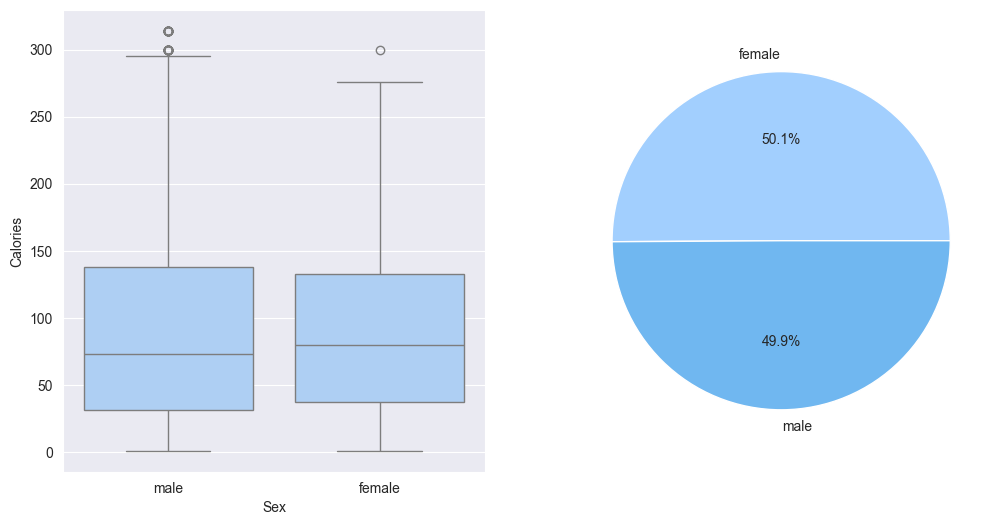

In [9]:
for col in categorical_columns:
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    sns.boxplot(x=train_df[col], y=train_df['Calories'])
    
    plt.subplot(1,2,2)
    counts = train_df[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

In [10]:
train_df[numerical_columns].skew()

Age           0.436397
Height        0.051777
Weight        0.211194
Duration      0.026259
Heart_Rate   -0.005668
Body_Temp    -1.022361
Calories      0.539196
dtype: float64

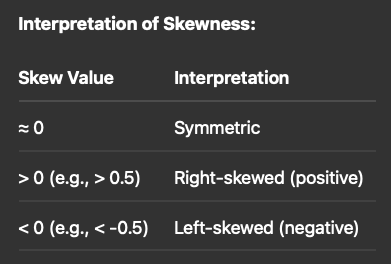

### 2. Plotting and observe the numerical features:
- `Age`:
    - heavily skewed to right
    - frequency decrease with increase in age
    - may suggest that mostly younger people using the workout monitoring app
- `Height`: 
    - minimal skew
    - symmetrical, bell shaped, approximately Gaussian (Normal) distribution
- `Weight`: 
    - slightly right skewed, which represent real-world data, upper limits can vary for wegihts
- `Duration`: 
    - approximately Uniform distribution
- `Heart_rate`: 
    - Normally distributed with slight righ skew
    - small portion of people with elevated heart rates
- `Body_temp`: 
    - Negatively skewed
    - after workout, slightly elevated from normal temperatures makes sense
- `Calories`: 
    - Right skewed, most people burn fewer calories per session, small fraction burn significantly more

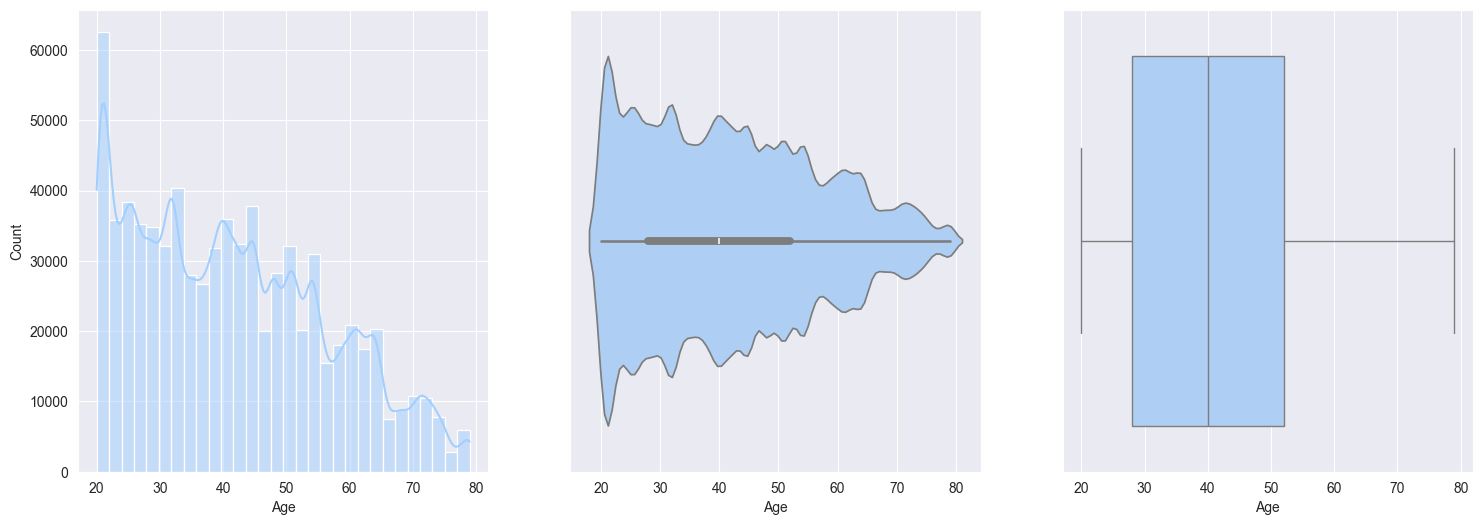

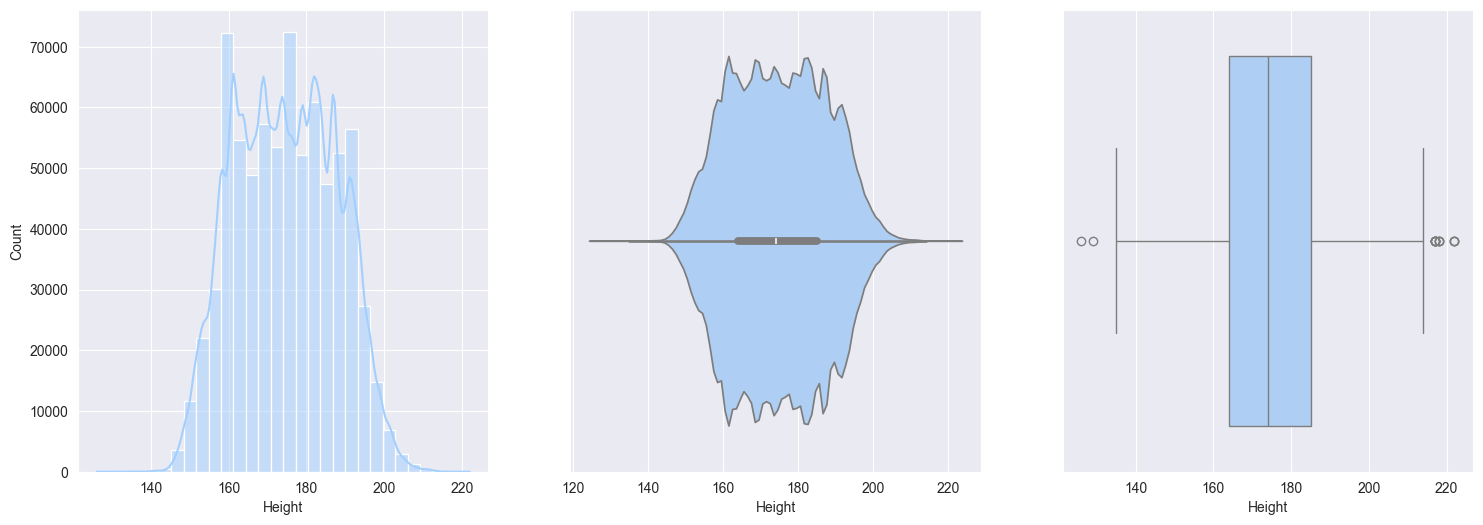

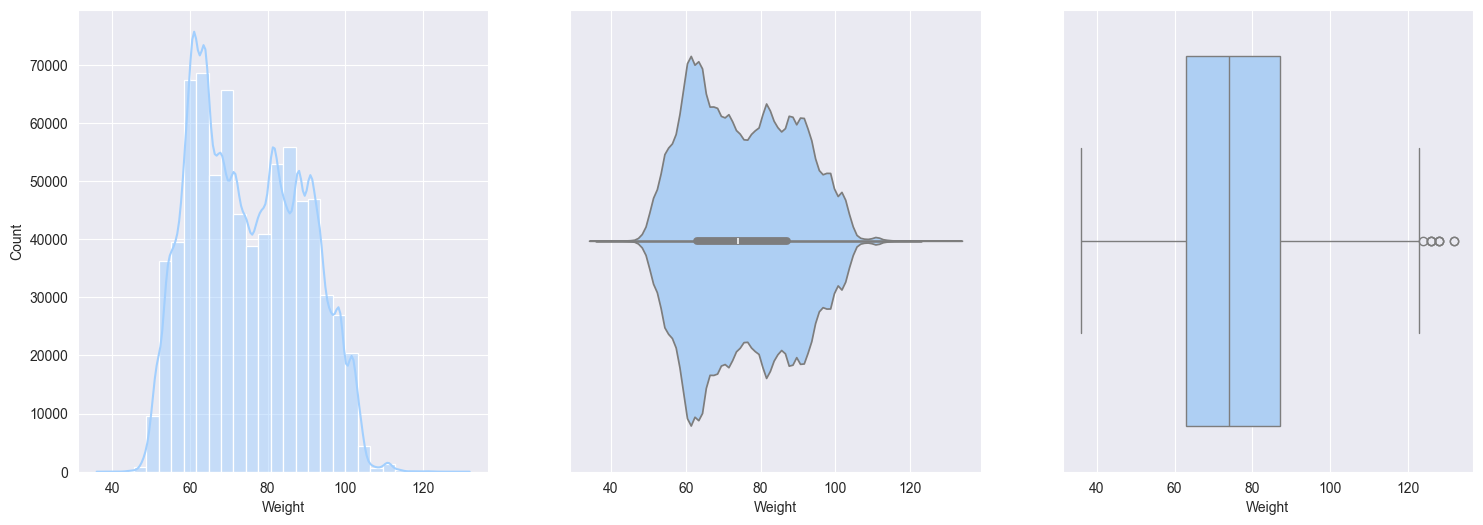

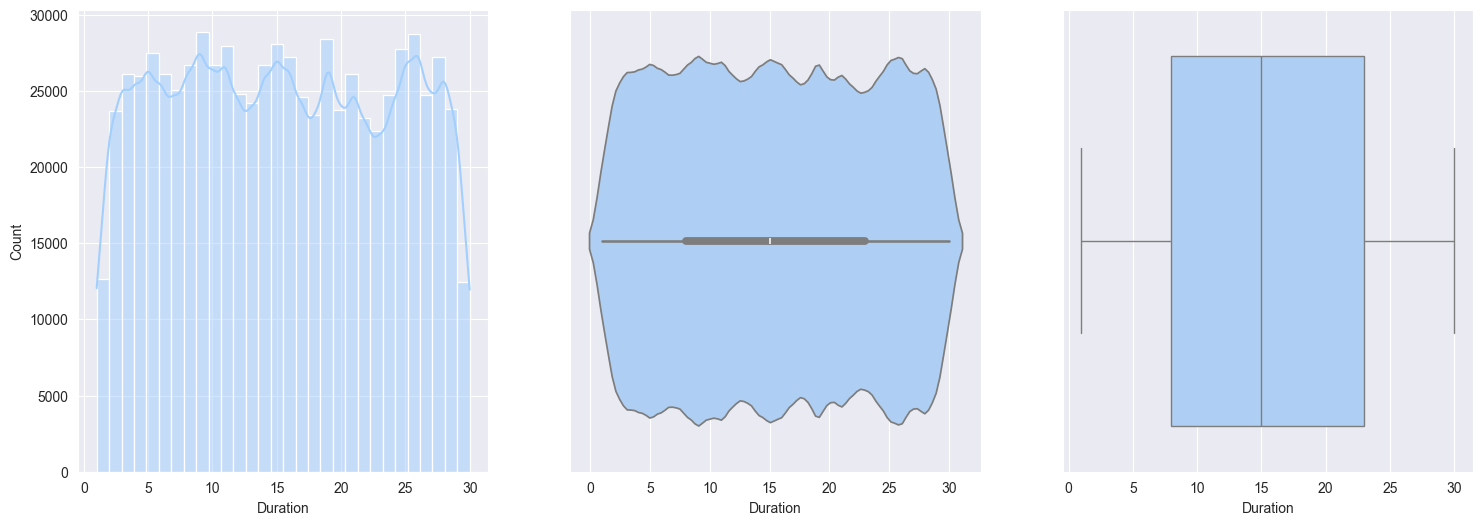

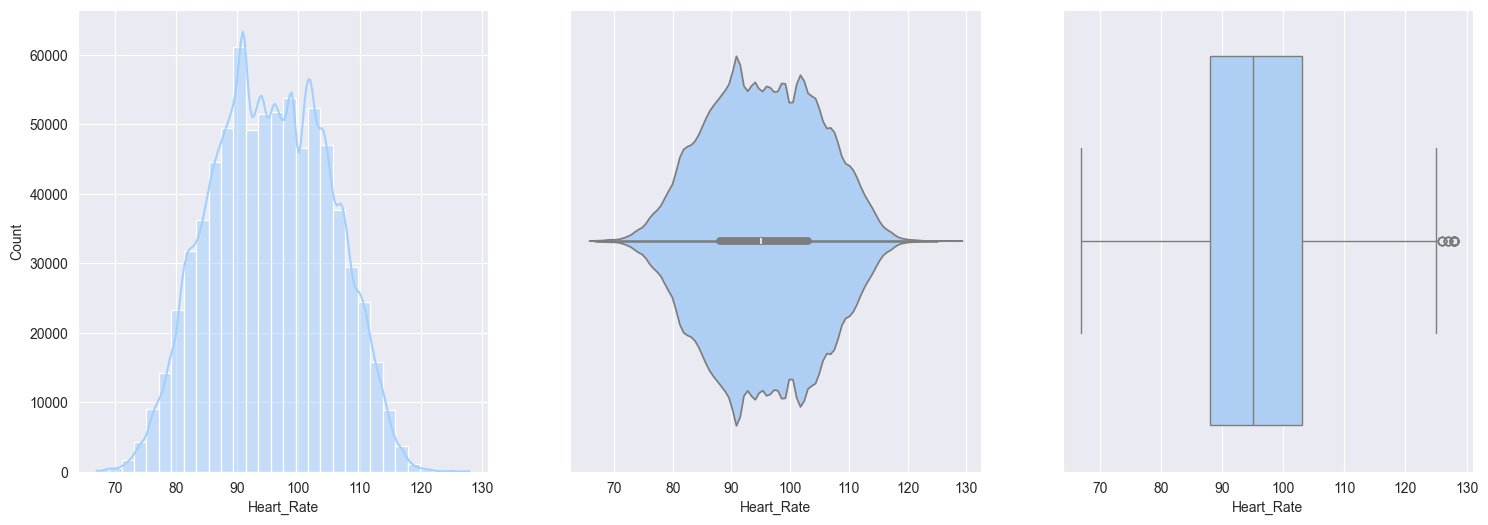

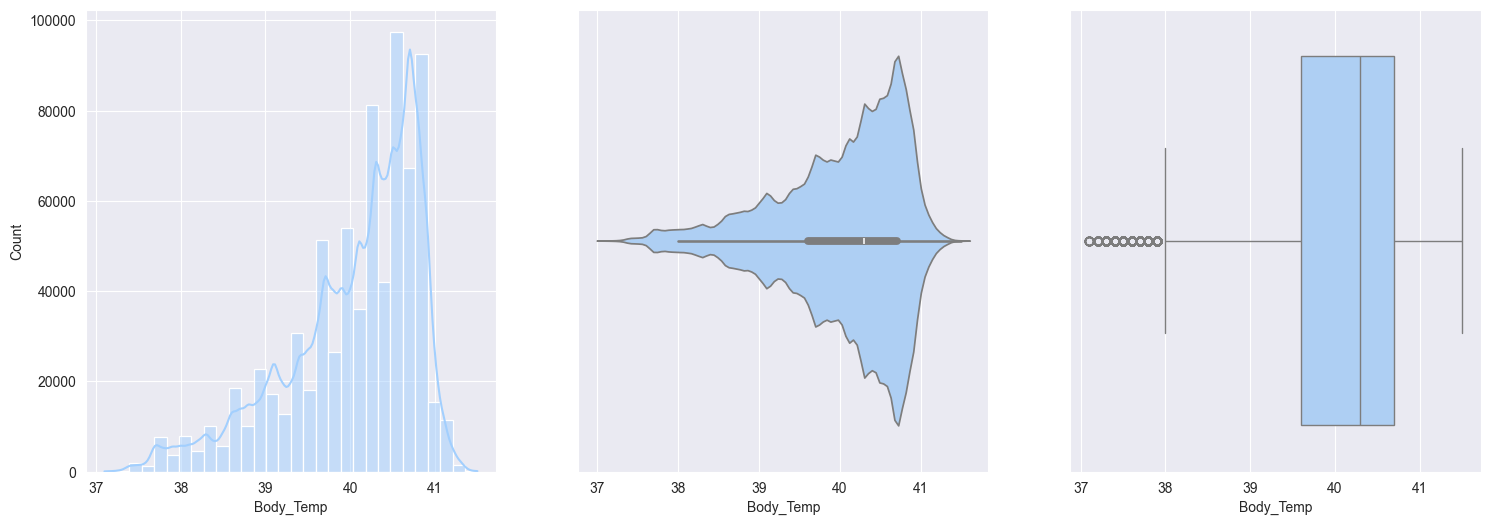

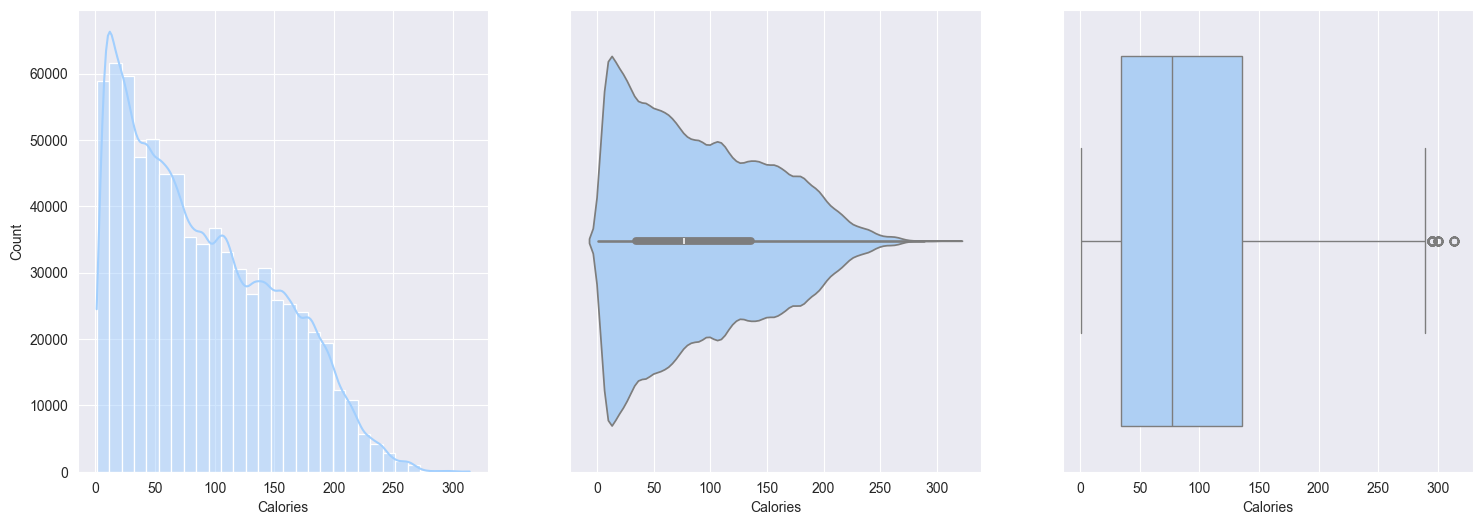

In [11]:
for col in numerical_columns:
    plt.figure(figsize=(18,6))

    plt.subplot(1,3,1)
    sns.histplot(data=train_df[col], bins=30, kde=True)

    plt.subplot(1,3,2)
    sns.violinplot(x=train_df[col])

    plt.subplot(1,3,3)
    sns.boxplot(data=train_df[col], orient='h')

In [12]:
#| echo: false
#| output: false

# There are "14,919" outliers in Body_temp feature, where temperature is less than 30
train_df[train_df['Body_Temp']<38].shape[0] / train_df.shape[0] * 100

1.9892

# Bivariate analysis

1. Let's find the **Correlations** between the numerical features

In [13]:
# train_df[numerical_columns].corr().style.background_gradient()
corr = train_df[numerical_columns].corr()

<Axes: >

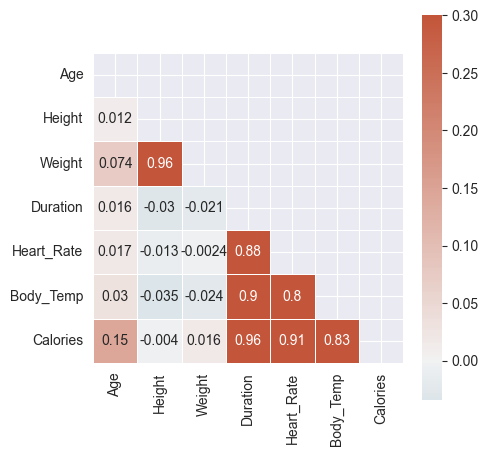

In [14]:
# Plot the correlation matrix with colors

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(5, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

- Quite clear from above color gradients:
    - `Calories` is highly correlated with `Duration`, `Heart_Rate`, `Body_Temp`
    - `Heart_Rate` and `Body_Temp` are highly correlated
    - `Duration` and `Heart_Rate` are highly correlated
    - `Duration` and `Body_Temp` are highly correlated

2. Scatter plots amongst the numerical features
    - Hardly any patterns emerge when we compare `Calories` to `Age`, `Weight`, `Height`
    - Whereas, **strong patterns** can be seen with `Duration`, `Heart_Rate`, `Body_Temp`

So it's fair to say that scatter plots confirm the correlation numbers

In [15]:
#| echo: false
#| output: false

# for col in numerical_columns[:-1]:
#     plt.figure(figsize=(10,5))
#     sns.scatterplot(x=train_df[col], y=train_df['Calories'], alpha=0.5)
#     plt.title(f'{col} vs Calories')
#     plt.xlabel(col)
#     plt.ylabel('Calories')
#     plt.show()

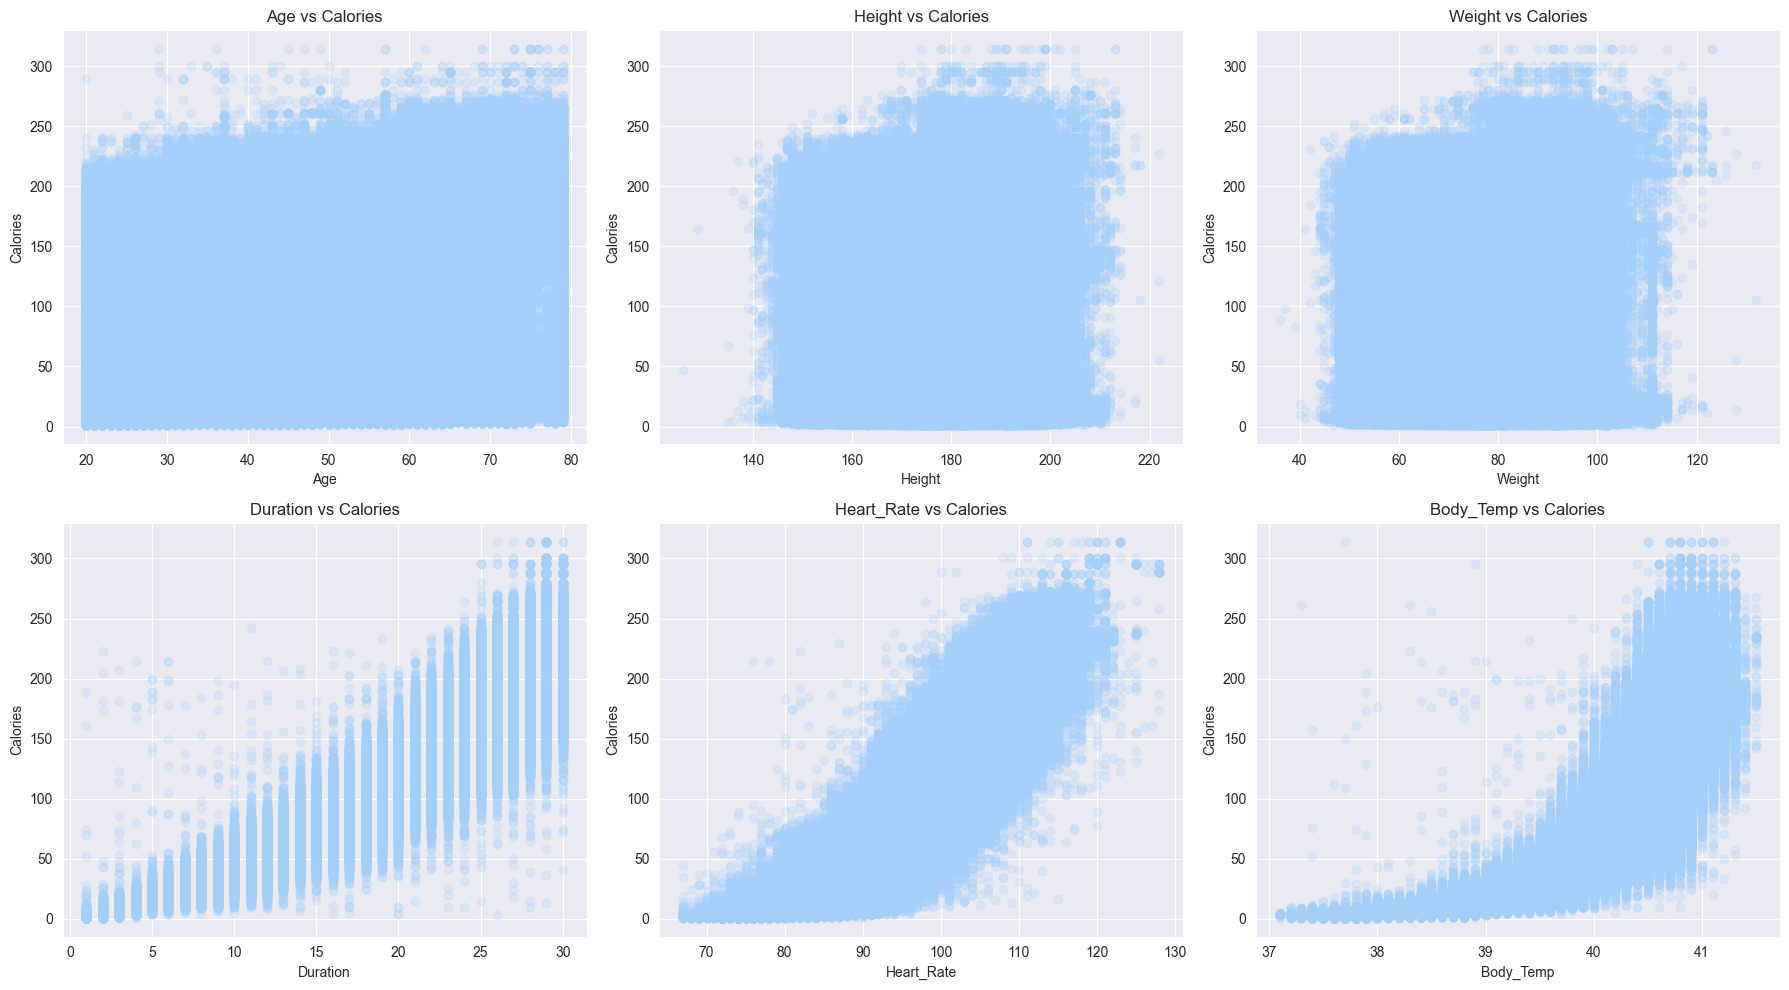

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration

target = 'Calories'
for i, feature in enumerate(numerical_columns[:-1]):
    axes[i].scatter(train_df[feature], train_df[target], alpha=0.2)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'{feature} vs {target}')

plt.tight_layout()
plt.show()

# Data preprocessing

1. Map the `Sex` feature into numerical

In [17]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})

2. Make `X` and `y` variables

In [18]:
X = train_df.drop('Calories', axis=1)
y = np.log1p(train_df['Calories'])
y_scale = (train_df['Calories'] - train_df['Calories'].mean()) / train_df['Calories'].std()

X_test = test_df

In [19]:
#| echo: false
#| output: false

# print(train_df['Calories'].describe())
# print('----'*10)
# print(y.describe())

In [20]:
#| echo: false
#| output: false

train_df[train_df['Calories']>200].shape[0]/train_df.shape[0] * 100

4.9448

3. Now let's try to differentiate between **log transformation** (`y`) and **standard scaled** (`y_scale`)
    - Observations from the *boxplots* and *histplots* below:
        - Scaling just scales the feature, but the distributions remains same, skew remains the same, outliers are still outliers
        - Log transform changes the distribution by reducing the skew, also outliers are compressed

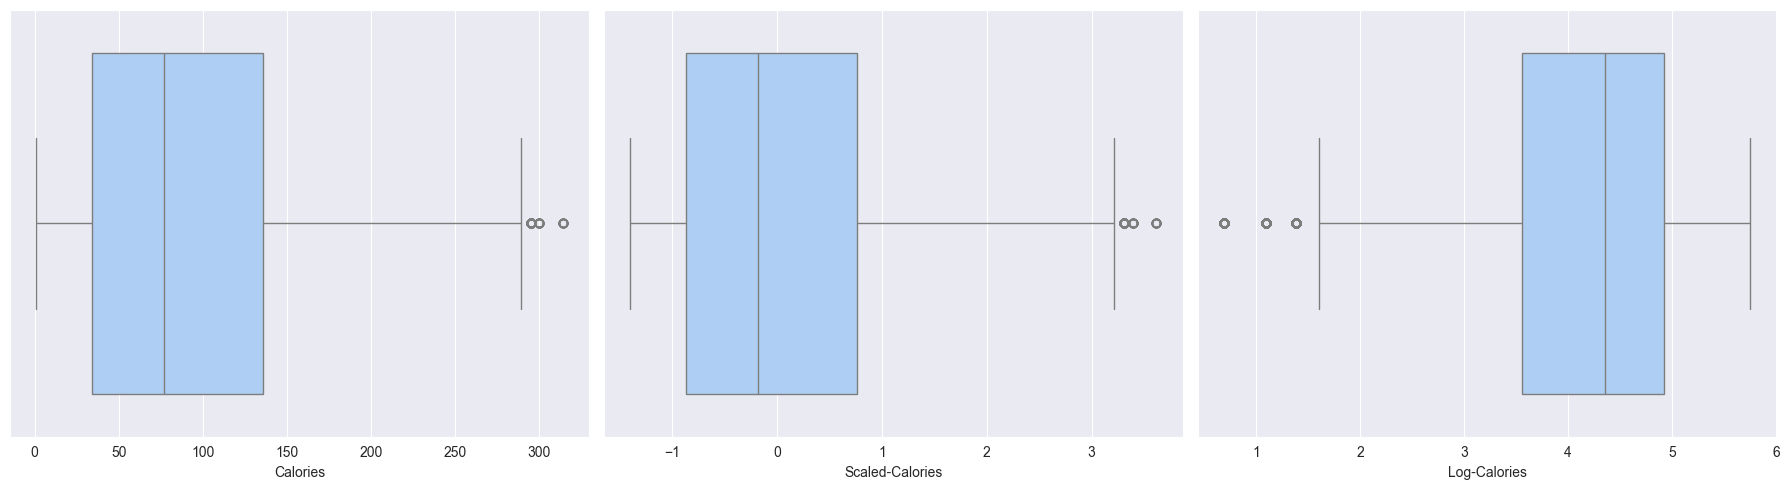

In [21]:
#| echo: false

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.boxplot(train_df['Calories'], orient='h')

plt.subplot(1,3,2)
sns.boxplot(y_scale, orient='h')
plt.xlabel(f'Scaled-Calories')

plt.subplot(1,3,3)
sns.boxplot(y, orient='h')
plt.xlabel(f'Log-Calories')

plt.tight_layout()
plt.show()

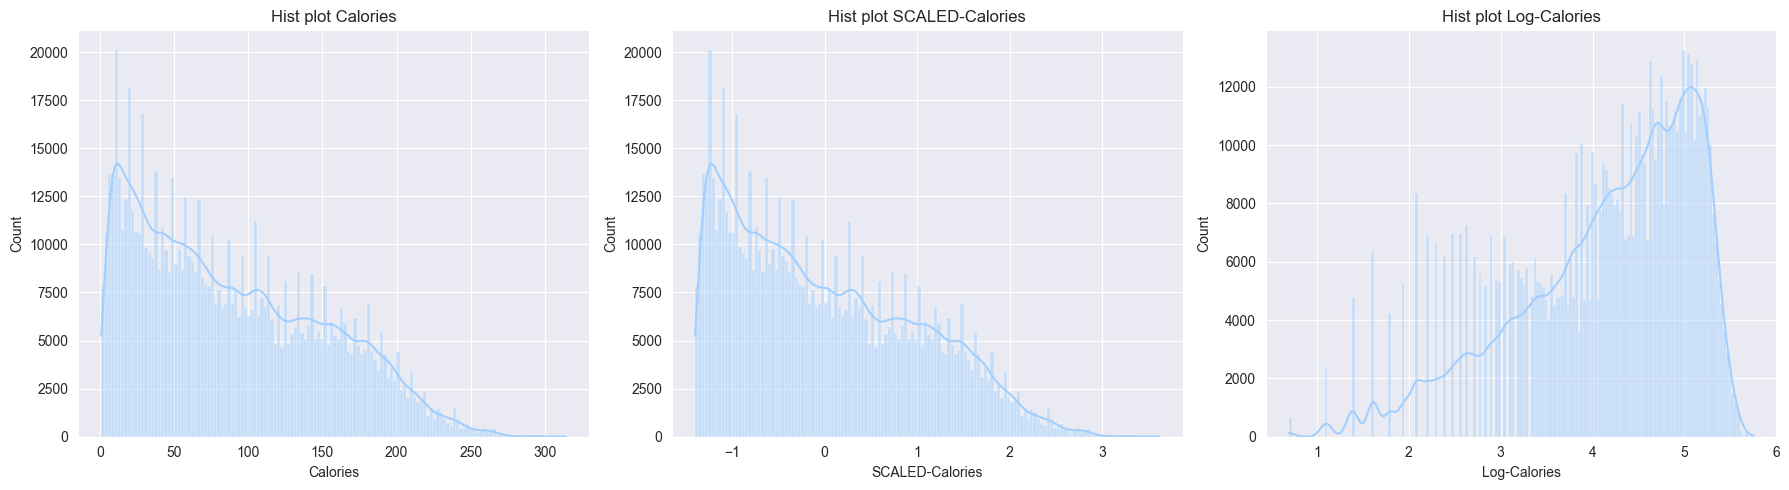

In [22]:
#| echo: false
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(train_df['Calories'], kde=True)
plt.title(f'Hist plot Calories')

plt.subplot(1,3,2)
sns.histplot(y_scale, kde=True)
plt.xlabel(f'SCALED-Calories')
plt.title(f'Hist plot SCALED-Calories')

plt.subplot(1,3,3)
sns.histplot(y, kde=True)
plt.xlabel(f'Log-Calories')
plt.title(f'Hist plot Log-Calories')

plt.tight_layout()
plt.show()

In [23]:
# renaming Gender in original_df to Sex

original_df['Gender'] = original_df['Gender'].map({'male':0, 'female':1})
original_df = original_df.rename(columns={'Gender': 'Sex'})

In [24]:
#| echo: false
#| output: false
(original_df.isna().sum() == 0).all()

np.True_

In [25]:
#| echo: false
#| output: false
original_df.columns == train_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

4. As now we have original_df with same column names and no null samples, we can merge the train_df with original_df

In [26]:
# merge the original data to train_df
train_df = pd.concat([train_df, original_df])

5. This way we can get the **Mutual Information** scores of every feature in `X` against `y` (target)

In [27]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X=X, y=y, n_neighbors=5)
mutual_info = pd.Series(mi)
mutual_info.index = X.columns

4. The results of *mututal_info_regression* clearly concurs the scatter plot patterns and correlations
- `Duration`, `Heart_Rate`, `Body_Temp` are containing most mutual information with the Calories
- But, then, by human understanding, `Duration` also positively impacts both `Heart_Rate` & `Body_Temp`

In [28]:
mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns=['Mutual Information'])
mutual_info

,Mutual Information
Duration,1.641538
Body_Temp,1.122338
Heart_Rate,0.977394
Age,0.098674
Weight,0.055857
Height,0.054949
Sex,0.016582


6. Split the merged df, into train, dev, test split

In [29]:

# shuffle
train_df = train_df.sample(frac=1)

In [74]:
def scale_numerical_feature(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Basic models

### Simple Linear regression
    - Using just most informative of the features
    - I want to see how using just `Duration` would predict the `Calories`

In [711]:
class SimpleLinearRegression:
    def __init__(self):
        self.w = np.random.rand() * 0.01
        self.b = np.random.rand() * 0
    
    def get_params(self):
        return (self.w, self.b)
    
    # compute predictions for the given input X
    def predict(self, X):
        return (self.w * X + self.b)

    def fit(self, X, y, epochs=100, lr = 0.01):
        n = len(X)
        for epoch in range(epochs):
            # calculate prediction for X
            y_pred = self.predict(X)

            # calculate loss wrt y
            loss = np.sqrt(np.mean((y_pred - y) ** 2))

            # calculate gradients
            dw = (2/n) * np.sum((y_pred - y) * X)
            db = (2/n) * np.sum(y_pred - y)

            # update the params
            self.w -= lr * dw
            self.b -= lr * db

            # print(f'loss={loss}')
            if (epoch + 1) % 100 == 0 or epoch == 0:
                print(f'Epoch {epoch + 1}: Loss {loss:.4f}')
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)

        mse = np.mean((y_pred - y) ** 2)
        rmse = np.sqrt(mse)
        
        y_pred = np.clip(y_pred, 0, None)
        y = np.clip(y, 0, None)
        log_pred = np.log1p(y_pred)
        log_true = np.log1p(y)
        rmsle = np.sqrt(np.mean((log_pred - log_true) ** 2))
        print(f'rmse: {rmse:.4f} | rmsle: {rmsle:.4f}')
        # return mse, rmse, rmsle

In [712]:
n1 = int(0.8 * len(train_df))
n2 = int(0.9 * len(train_df))
X = scale_numerical_feature(train_df['Heart_Rate'])
y = train_df['Calories']
# y = np.log1p(train_df['Calories'])
# as we use RMSLE eval metric, we must not be pre-transforming Calories with np.log1p

X_train, y_train = X.values[:n1], y.values[:n1]
X_dev, y_dev = X.values[n1:n2], y.values[n1:n2]
X_test, y_test = X.values[n2:], y.values[n2:]

In [713]:
# naive baseline (based on mean value prediction)

y_baseline = np.full_like(y_test, y_train.mean())
rmse_baseline = np.sqrt(np.mean((y_baseline - y_test) ** 2))
rmsle_baseline = np.sqrt(np.mean((np.log1p(y_baseline) - np.log1p(y_test)) ** 2))
print(f'rmse-baseline: {rmse_baseline}')
print(f'rmsle-baseline: {rmsle_baseline}')
print(f'mean of y_train: {y_train.mean()}')

rmse-baseline: 62.389940344734526
rmsle-baseline: 1.0252838505834856
mean of y_train: 88.2883545751634


Above, `rmse_baseline` indicates --> predicting with mean will be off on average by 62.4 calories
- Hence, we must target that our simplest model acheives `rmse` below this number

In [714]:
model_1 = SimpleLinearRegression()
model_1.fit(X_train, y_train, epochs=200, lr=0.1)

Epoch 1: Loss 108.1040
Epoch 100: Loss 26.0761
Epoch 200: Loss 26.0761


In [715]:
# return mse, rmse, rmsle
model_1.evaluate(X_test, y_test)

rmse: 26.0880 | rmsle: 0.7414


- `RMSE` and `RMSLE` both have improved over the baseline numbers

- Let's work on comparing our custom linear regression model with the standard Sklearn LR

In [716]:
from sklearn.linear_model import LinearRegression

In [721]:
def evaluate(y_pred, y_true):
    mse = np.mean((y_pred - y_true) ** 2)
    rmse = np.sqrt(mse)

    y_pred = np.clip(y_pred, 0, None)
    y_true= np.clip(y_true, 0, None)
    log_pred = np.log1p(y_pred)
    log_true = np.log1p(y_true)
    rmsle = np.sqrt(np.mean((log_pred - log_true) ** 2))
    print(f'rmse: {rmse:.4f} | rmsle: {rmsle:.4f}')
    # return rmse, rmsle

In [722]:
sk_model_1 = LinearRegression()
sk_model_1.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [723]:
y_pred = sk_model_1.predict(X_test.reshape(-1,1))
evaluate(y_pred, y_test)

rmse: 26.0880 | rmsle: 0.7414


In [726]:
print(f'Weight converged to, by sklearn model: {sk_model_1.coef_[0]}')
print(f'Weight converged to, by custom model:   {model_1.get_params()[0]}')

Weight converged to, by sklearn model: 56.67769001861729
Weight converged to, by custom model:   56.67769001861444


In [727]:
print(f'bias converged to, by sklearn model: {sk_model_1.intercept_}')
print(f'bias converged to, by custom model:   {model_1.get_params()[1]}')

bias converged to, by sklearn model: 88.29586143576026
bias converged to, by custom model:   88.29586143576023


In [728]:
print(f'weights reached at from two methods are same? {math.isclose(sk_model_1.coef_[0], model_1.get_params()[0])}')
print(f'biases reached at from two methods are same? {math.isclose(sk_model_1.intercept_, model_1.get_params()[1])}')

weights reached at from two methods are same? True
biases reached at from two methods are same? True


- Good to conclude that out custom LR reach at almost same `weight` and `bias` as sklearn LR

In [737]:
def r2_score(y_pred, y_true):
    # print(f'shapes: y_pred - {y_pred.shape} | y_true - {y_true.shape}')
    ss_total = np.sum((y_pred - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_pred - y_true) ** 2)
    r2 = 1 - (ss_res / ss_total)
    # print(f'ss_total: {ss_total} | ss_res: {ss_res}')
    print(f'r2: {r2:.4f}')
    # return r2

In [738]:
y_pred_1 = model_1.predict(X_test)
y_pred_sk_1 = sk_model_1.predict(X_test.reshape(-1,1))

r2_score(y_pred_1, y_test), r2_score(y_pred_sk_1, y_test)

r2: 0.7880
r2: 0.7880


(None, None)

- R-squared also is similar using both models: 78.8 %

### Making it multivariate regression

In [739]:
class MultipleLinearRegression:
    def __init__(self, n_features):
        self.w = np.random.rand(n_features,) * 0.1
        self.b = np.random.rand() * 0.0

    def get_params(self):
        return (self.w, self.b)
    
    # compute predictions for the given input X
    def predict(self, X):
        # (n_samples, n_features) @ (n_features,)    --> (n_samples,)
        out = X @ self.w + self.b
        return out

    def fit(self, X, y, epochs=100, lr = 0.01):
        n = len(X)
        for epoch in range(epochs):
            # calculate prediction for X
            y_pred = self.predict(X)

            # calculate loss wrt y
            loss = np.sqrt(np.mean((y_pred - y)**2))

            # calculate gradients
            dw = (2/n) * np.dot(X.T, (y_pred - y)) # shape: (n_features,)
            db = (2/n) * np.sum(y_pred - y) # shape: scalar

            # update the params
            self.w -= lr * dw
            self.b -= lr * db

            # print(f'loss={loss}')
            if (epoch + 1) % 100 == 0 or epoch == 0:
                print(f'Epoch {epoch + 1}: Loss {loss:.4f}')
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)

        mse = np.mean((y_pred - y) ** 2)
        rmse = np.sqrt(mse)

        # rmsle = np.sqrt(np.mean((np.log1p(y) - np.log1p(y_pred)) ** 2))
        y_pred = np.clip(y_pred, 0, None)
        y = np.clip(y, 0, None)
        log_pred = np.log1p(y_pred)
        log_true = np.log1p(y)
        rmsle = np.sqrt(np.mean((log_pred - log_true) ** 2))

        print(f'rmse: {rmse:.4f} | rmsle: {rmsle:.4f}')
        # return mse, rmse, rmsle

In [742]:
#| echo: false

# X = np.random.randn(5,2)
# y = np.ones((5,))

# w = np.random.randn(2,)

# yHat = X @ w
# (X.T @ (yHat-y))

#### n_features = 2

In [743]:
X = scale_numerical_feature(train_df[['Duration', 'Heart_Rate']])
y = train_df['Calories']


X_train, y_train = X.values[:n1], y.values[:n1]
X_dev, y_dev = X.values[n1:n2], y.values[n1:n2]
X_test, y_test = X.values[n2:], y.values[n2:]

In [744]:
model_2 = MultipleLinearRegression(n_features=2)
model_2.fit(X_train, y_train, epochs=200, lr=0.5)

Epoch 1: Loss 108.0551
Epoch 100: Loss 15.1002
Epoch 200: Loss 15.1002


In [745]:
sk_model_2 = LinearRegression()
sk_model_2.fit(X_train, y_train)

LinearRegression()

In [747]:
print(f'Weight converged to, by sklearn model: {sk_model_2.coef_}')
print(f'Weight converged to, by custom model:   {model_2.get_params()[0]}')

Weight converged to, by sklearn model: [43.88145203 18.28755783]
Weight converged to, by custom model:   [43.88145203 18.28755783]


In [748]:
np.allclose(sk_model_2.intercept_, model_2.get_params()[1])

True

In [749]:
# return mse, rmse, rmsle
model_2.evaluate(X_test, y_test)

rmse: 15.1551 | rmsle: 0.6282


In [750]:
y_pred_2 = model_2.predict(X_test)
y_pred_sk_2 = sk_model_2.predict(X_test)

r2_score(y_pred_2, y_test), r2_score(y_pred_sk_2, y_test)

r2: 0.9372
r2: 0.9372


(None, None)

#### n_features = 3

In [751]:
X = scale_numerical_feature(train_df[['Duration', 'Heart_Rate', 'Body_Temp']])
y = train_df['Calories']

X_train, y_train = X.values[:n1], y.values[:n1]
X_dev, y_dev = X.values[n1:n2], y.values[n1:n2]
X_test, y_test = X.values[n2:], y.values[n2:]

In [752]:
%time
model_3 = MultipleLinearRegression(n_features=3)
model_3.fit(X_train, y_train, epochs=300, lr=0.1)

CPU times: user 2 μs, sys: 1e+03 ns, total: 3 μs
Wall time: 3.81 μs
Epoch 1: Loss 108.0602
Epoch 100: Loss 14.2118
Epoch 200: Loss 13.9630
Epoch 300: Loss 13.9518


In [753]:
sk_model_3 = LinearRegression()
sk_model_3.fit(X_train, y_train)

LinearRegression()

In [754]:
#| echo: false
print(f'Weight converged to, by sklearn model: {sk_model_3.coef_}')
print(f'Weight converged to, by custom model:   {model_3.get_params()[0]}')

Weight converged to, by sklearn model: [ 55.76189897  18.59805859 -13.45353933]
Weight converged to, by custom model:   [ 55.41889798  18.73747023 -13.23810133]


In [755]:
np.allclose(sk_model_3.intercept_, model_3.get_params()[1])

True

In [756]:
# return mse, rmse, rmsle
model_3.evaluate(X_test, y_test)

rmse: 13.9925 | rmsle: 0.5184


In [757]:
y_pred_3 = model_3.predict(X_test)
y_pred_sk_3 = sk_model_3.predict(X_test)

r2_score(y_pred_3, y_test), r2_score(y_pred_sk_3, y_test)

r2: 0.9469
r2: 0.9469


(None, None)

There is a clear improvement in the regression as it does increase the variability explained over mean prediction, by increase in number of features:
- n_features = 1 | R-squared = 78.8 %
- n_features = 2 | R-squared = 83.7 %
- n_features = 3 | R-squared = 94.6 %

### Implementing Mini-batch gradient descent
- For now we were only calculating loss over entire `X_train` at once and running gradient descent.
- So let's try to first break it up into mini-batches
- This will help us train and also converge faster hopefully

In [775]:
# training with mini-batch
class CustomLinearRegression:
    def __init__(self):
        self.w = None
        self.b = None
    
    def get_params(self):
        return (self.w, self.b)
    
    def predict(self, X):
        out = X @ self.w + self.b
        return out

    def compute_loss(self, y_pred, y):
        loss = np.sqrt(np.mean((y_pred - y)**2))
        return loss
    
    def compute_gradients(self, X, y, y_pred):
        n = len(y)
        dw = (2/n) * np.dot(X.T, (y_pred - y)) # shape: (n_features,)
        db = (2/n) * np.sum(y_pred - y) # shape: scalar
        return dw, db

    def fit(self, X, y, epochs=100, batch_size = 128, lr = 0.01):
        n_samples, n_features = X.shape
        self.w = np.random.rand(n_features,) * 0.01
        self.b = np.random.rand() * 0.0

        for epoch in range(epochs):
            indexes = np.random.choice(a = n_samples, size = batch_size)
            Xb, yb = X[indexes], y[indexes]
            # print(Xb.shape, yb.shape)

            # calculate prediction for X
            y_pred = self.predict(Xb)

            # calculate loss wrt y
            loss = self.compute_loss(y_pred, yb)

            # calculate gradients
            dw, db = self.compute_gradients(Xb, yb, y_pred)

            # update the params
            self.w -= lr * dw
            self.b -= lr * db

            # print(f'loss={loss}')
            self.print_loss(loss, epoch)
            # if (epoch + 1) % 1000 == 0 or epoch == 0:
            #     print(f'Epoch {epoch + 1}: Loss {loss:.4f}')
    
    def print_loss(self, loss, epoch):
        if (epoch + 1) % 1000 == 0 or epoch == 0:
                print(f'Epoch {epoch + 1}: Loss {loss:.4f}')

    def evaluate(self, X, y):
        y_pred = self.predict(X)

        mse = np.mean((y_pred - y) ** 2)
        rmse = np.sqrt(mse)

        # rmsle = np.sqrt(np.mean((np.log1p(y) - np.log1p(y_pred)) ** 2))
        y_pred = np.clip(y_pred, 0, None)
        y = np.clip(y, 0, None)
        log_pred = np.log1p(y_pred)
        log_true = np.log1p(y)
        rmsle = np.sqrt(np.mean((log_pred - log_true) ** 2))

        print(f'rmse: {rmse:.4f} | rmsle: {rmsle:.4f}')
        # return mse, rmse, rmsle

In [776]:
%time
model_3_mb = CustomLinearRegression()
model_3_mb.fit(X_train, y_train, epochs=10000, batch_size=4096, lr=0.05)

CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 4.05 μs
Epoch 1: Loss 106.6047
Epoch 1000: Loss 13.9319
Epoch 2000: Loss 13.9302
Epoch 3000: Loss 13.7890
Epoch 4000: Loss 14.1124
Epoch 5000: Loss 14.4587
Epoch 6000: Loss 13.1583
Epoch 7000: Loss 14.1098
Epoch 8000: Loss 13.3162
Epoch 9000: Loss 13.8549
Epoch 10000: Loss 14.0191


In [772]:
model_3_mb.evaluate(X_test, y_test)

rmse: 13.9915 | rmsle: 0.5183


In [773]:
y_pred_3_mb = model_3_mb.predict(X_test)

r2_score(y_pred_3_mb, y_test), r2_score(y_pred_sk_3, y_test)

r2: 0.9470
r2: 0.9469


(None, None)

So, the mini-batch implementation is working, although
- The results are not any better, probably it takes way faster to run a single update
- Expectation is, when the data and model both become much more complex, the gains from using mini-batch must be visible

### Regularization - L2 norm

In [777]:
class CustomLinearRegressionL2(CustomLinearRegression):

    def __init__(self, lambda_ = 0.1):
        super().__init__()
        self.lambda_ = lambda_
    
    def print_loss(self, loss, epoch):
        if (epoch + 1) % 10000 == 0 or epoch == 0:
                print(f'Epoch {epoch + 1}: Loss {loss:.4f}')

    def compute_loss(self, y_pred, y):
        rmse = np.sqrt(np.mean((y_pred - y) ** 2))
        l2_penalty = self.lambda_ * np.sum(self.w ** 2)
        loss = rmse + l2_penalty
        return loss
    
    def compute_gradients(self, X, y, y_pred):
        n = len(y)
        dw = (2/n) * np.dot(X.T, (y_pred - y)) + (2 * self.lambda_ * self.w)
        db = np.sum(y_pred - y)
        return dw, db


In [782]:
model_3_l2 = CustomLinearRegressionL2(lambda_=0.01)
model_3_l2.fit(X_train, y_train, epochs=20000, batch_size=1024, lr=1e-4)

Epoch 1: Loss 111.0268
Epoch 10000: Loss 32.2485
Epoch 20000: Loss 31.9944


In [783]:
model_3_l2.evaluate(X_test, y_test)

rmse: 17.2014 | rmsle: 0.6512


## Using all features

In [ ]:
numerical_columns.pop()
numerical_columns

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

In [785]:
# scaling all the numerical features
X = train_df.drop('Calories', axis=1)
X[numerical_columns] = scale_numerical_feature(X[numerical_columns])
y = train_df['Calories']
# y = np.log1p(train_df['Calories'])

X_train, y_train = X.values[:n1], y.values[:n1]
X_dev, y_dev = X.values[n1:n2], y.values[n1:n2]
X_test, y_test = X.values[n2:], y.values[n2:]


In [792]:
model_l2_all = CustomLinearRegressionL2(lambda_=0.01)
model_l2_all.fit(X_train, y_train, epochs=20000, batch_size=4096, lr=1e-4)

Epoch 1: Loss 107.9762
Epoch 10000: Loss 30.4919
Epoch 20000: Loss 30.5582


In [793]:
model_l2_all.evaluate(X_dev, y_dev)

rmse: 14.9929 | rmsle: 0.6459


With using all of the features, we see there is improvement in R-squared (although small)

# Test set predictions with our best model (as per rmsle)

In [795]:
# test_df.head()

In [796]:
# # test_df[numerical_columns] = scale_numerical_feature(test_df[numerical_columns])
# X = scale_numerical_feature(test_df[['Duration', 'Heart_Rate', 'Body_Temp']])
# X_test = X.values
# # X.shape, test_df.shape

# ids = X.index

In [797]:
# y_test_preds = model_3.predict(X_test)
# y_test_preds = np.clip(y_test_preds, 0, None)

In [798]:
# import csv

# with open('submission_using_3features.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerow(['id', 'Calories'])
#     writer.writerows(zip(ids.tolist(), y_test_preds.tolist()))

# Conclusion

After trying with multiple feature combinations (or even all features), to model the Calories:


- We notice that the `rmsle` metric an order of magnitude larger than what mostly submissions show in the Kaggle competitions
- Possibly, it's because of the **Heteroskedasticity** in the data, i.e., the errors vary in different ranges of X.
- The basic assumption for Linear Regression to work is that data should have some linear relationaship.
- Therefore, for us to reach desired range of `rmsle`, we shall pivot to more advanced algorithms.
    - XGBoost, CatBoost etc.